# Практическое задание по методам оптимизации номер 1.
## Кириленко Елена

# 0) При реализации алгоритма разрешается использовать только библиотеки из requierments.txt

В него входит:
1. jupyter - библиотека для показа ноутбуков
2. numpy - библиотека для вычислений
3. matplotlib - библиотека для визуализации

## Установка 

1. Устанавливаем python3 и virtualenv
2. создаем окружение virtualenv --no-site-packages  lin_prog
3. активируем окружение source activate lin_prog
4. устанавливаем зависимости pip install -r requirements.txt
5. запускаем jupyter и начинаем работать jupyter notebook




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import random

In [2]:
import warnings
warnings.filterwarnings("ignore")

# ============================================================
# Задача на Симплекс метод

## 1) На вход Вашему функцию должны приходить:

0. число переменных = n
1. матрица A (n x m) (tsv, вещественные числа)
2. вектор  b  ограничений типа неравнство
4. вектор c функции полезности для задачи max cx 
5. алгоритм выбора входящей переменной (правило Бленда, Лексикографический метод)
6. (не обязательный параметр) стартовую базисную точку

## 2) На выход программа должна выдавать:

### Обязательная часть (0.7 баллов):
0. Ответ и оптимальную точку при положительных компонентах вектора b
1. Количество итераций потребовавшихся для решения задачи
2. при n=2 выдавать процесс решения (draw=True)
3. Напишите программу которая будет отвечать на вопрос оптимально ли приведенное решение, например


### Дополнительная часть  (0.4 балл):
0. Максимально использовать матричные вычисления (0.2 балла)
1. Работать в случае отрицательных чисел в векторе b (0.2 балла)




## Алгоритм решения

**Изначальчальная задача : **<br>
$Z = c^{T} X \rightarrow max$<br>
$AX <= b$ <br>
$X >= 0$ <br>
<br>
**Переход к канонической задаче ЛП** <br>
Добавляем $m( = $кол-ву неравенств) фиктивных переменных. <br>
Вначале за базисные переменные берем фиктивные переменные.(в случае неотрицательного вектора b)<br>
<br>
**Шаг симлекс-метода** <br>
Поймем как строить симплекс-таблицу (обнавлять матрицу A и векторы c и b) для следующего шага, зная таблицу предыдущего шага.<br>
Пусть на предыдущем шаге задача выглядела так: <br>
$Z = c^{T} X + k$, где в $c^{T}$ ненулевыми являются коэффициенты, соответствующие небазисным переменным <br>
$AX = b$ <br>
$X >= 0$ <br>

Пусть $X_b$ и $X_n$ - векторы новых базисных и небазисных переменных (выбраны в соответствии с выбранным методом)<br>
$A_b$ и $A_n$ - столбцы матрицы, соответствующие новым базисным и небазисным переменным соответственно.<br>
$c_b$ и $c_n$ - коэффициенты весовой функции, соответствующие новым базисным и небазисным переменным <br> <br>
Тогда: <br>
$AX = A_b X_b + A_n X_n = b$ <br>
$\Rightarrow {A_b}^{-1}AX = X_b + {A_b}^{-1}A_n X_n = {A_b}^{-1}b$ <br>
$\Rightarrow {c_b}^T {A_b}^{-1}AX = {c_b}^T X_b + {c_b}^T {A_b}^{-1}A_n X_n = {c_b}^T {A_b}^{-1}b $   $(*)$ <br>

$Z - c^{T} X= Z - {c_b}^T X_b - {c_n}^T X_n = k$ $(**)$<br> <br>

Нужно переписать весовую функцию так, чтобы в ней коэффициенты при базисных переменных были равны 0 и переписать матрицу ограничений так, чтобы в них базисные переменные имели коэффициент 1.(Последнее уже сделали ранее) <br>
Прибавим $(*)$ к $(**)$ : <br>
$Z - c^{T} X + {c_b}^T {A_b}^{-1}AX = Z - {c_b}^T X_b - {c_n}^T X_n +  {c_b}^T X_b + {c_b}^T {A_b}^{-1}A_n X_n = k + {c_b}^T{A_b}^{-1}b$ <br>
$\Rightarrow Z - c^{T} X + {c_b}^T {A_b}^{-1}AX = Z- {c_n}^T X_n+ {c_b}^T {A_b}^{-1}A_n X_n = k + {c_b}^T{A_b}^{-1}b$ <br>
То есть: $Z = ({c_n}^T + {c_b}^T {A_b}^{-1}A_n) X_n + k + {c_b}^T{A_b}^{-1}b$ - здесь коэффициенты при базисных переменных равны 0. <br>
 $\Rightarrow Z = (c^{T} - {c_b}^T {A_b}^{-1}A)X + k + {c_b}^T{A_b}^{-1}b$ <br>
Таким образом: <br>
$c_{new}^T = c^{T} - {c_b}^T {A_b}^{-1}A$ <br>
$k_{new} = k + {c_b}^T{A_b}^{-1}b$ <br>
$b_{new} = {A_b}^{-1}b$ <br>
$A_{new} = {A_b}^{-1}A$ <br>
<br>

**Методы выбора входящей и исходящей переменных** <br>
Метод максимального коэффициента: <br>
Входящей берем переменную с максимальным коэффициентом в весовой функции. <br>
Исходящей берем базисную переменную, которая первая зануляется при увеличении входящей. То есть берем в качестве исходящей i-ую базисную переменную, если $\frac{b_i}{k_i}$ минимально, где $k$ - столбец симплекс-таблицы, соответствующий входящей переменной. <br>
<br>
Метод Бланда <br>
Входящей берем такую переменную с минимальным индексом, что ее коэффициент в весовой функции > 0 <br>
Исходящей берем базисную переменную, выбранную так же как и в методе максимального коэффициента. <br>
<br>
Лексикографический метод <br>
Входящую берем любую из небазисных(рандомно) <br>
Исходящую берем следующим образом: поделим матрицу A на вектор-столбей b и возьмем ту базисную переменную, для которой строка, ей соответствующая будет лексикографически меньше остальных.<br> <br>

**Первая фаза симплекс метода** <br>
Если в векторе b есть отрицательные значения, то (0, 0, ...., 0) не является базисной допустимой точкой. Поэтому нам нужно найти допустимую базисную точку с помощью первой фазы симплекс метода. <br>
Для этого решаем следующую задачу ЛП: <br>
$-x_0 \rightarrow max$ <br>
$Ax - (x_0, x_0, ....,x_0)^T = b$, где A - матрица с уже добавленными переменными. <br>
Сначала в качестве базисных элементов возьмем фиктивные, добавленные при переходе к канонической формк(пока нам неважно, что получатся отрицальные значения). <br>
После берем $x_0$ входящей переменной, а в качестве выходящей ту, у которой в уравнении наименьший свободный член $b_i$. <br>
После этого проделываем обычные итерации симплекс метода, пока $x_0$ снова не попадет в небазисные. <br> <br>
Если в ходе первой фазы получилось так, что $x_0$ не вышел из базиса, но при этом все коэффициенты в весовой функции стали отрицательными, то это означает, что у исходно задачи нет базисных точек, а значит и нет решения.

Функция, которая в зависимости от метода выбирает выходящую в базис и исходящую из базиса переменные. <br>
Я реализовала 3 метода : метод наибольшего коэффициента, метод Бланда и лексикографический метод.

In [43]:
def choosing_elements(A, b, c, basis_elems, method):
    
    if method == 'max_coef':
        #индекс входящей переменной
        enter_index = np.argmax(c)

        #в сиплекс-таблице выбираем столбец k, соответствующий входящей переменной и 
        #находим базисную переменную, для которой  b_i / k_i минимально
        column_enter = A[:, enter_index]
        
        #индекс выходящей переменной
        temp = b / column_enter
        temp[temp <= 0] = 1e9
        leave_index = basis_elems[np.argmin(temp)]
        
        return (enter_index, leave_index)
    
    if method == 'blend':
        #выбираем минимальный индекс из небазисных с коэффициентом в весовой функции > 0
        enter_index = np.argwhere(c >0)[0][0]
        
        #как и в методе наибольшего коэффициента
        column_enter = A[:, enter_index]
        temp = b / column_enter
        temp[temp <= 0] = 1e9
        leave_index = basis_elems[np.argmin(temp)]
        return (enter_index, leave_index)
    
    if method == 'lexical':
        #рандомно выбираем входящую переменную
        enter_index = random.choice(np.argwhere(c >0).ravel())
        
        column_enter = A[:, enter_index]
        pos_ind = np.argwhere(column_enter > 0).ravel()
        temp_matrix = np.concatenate((b[pos_ind].reshape((len(b[pos_ind]),1)), A[pos_ind]), axis=1) / column_enter[pos_ind].reshape((len(column_enter[pos_ind]),1))

        for_comp_matrix = np.array([temp_matrix[:,i] for i in range(len(temp_matrix[0]))])
        leave_index = basis_elems[pos_ind[np.lexsort(list(for_comp_matrix)[::-1])[0]]]
        return (enter_index, leave_index)

Функция, проверяющая для точки p является ли она допустимой: то есть $Ap <= b$ и $p >= 0$

In [44]:
def is_allowable(A, b, p):
    #введем epsilon так как при подсчетах некотрые знаки пропадают
    epsilon = 10e-6
    
    if p[0] < -epsilon:
        return False
    if p[1] < -epsilon:
        return False
    for i in range(len(A)):
        if (A[i][0])*p[0] + (A[i][1])*p[1] > b[i] + epsilon:
            return False
    return True

Функция, которая в в случае 2-ух переменных рисует график решения

In [45]:
def draw_pic(A, b, c, trace, count_iter):
    
    #рисуем по 3 графика в строке
    count_raws = ((len(trace) - 1) // 3) + 1
    plt.figure(figsize=(20, 5.5 * count_raws))
    MAX = 1e3
    for i,point in enumerate(trace):
        plt.subplot(count_raws, 3, i + 1)
        #для каждого уравнения
        for j in range(len(A)):
            #рисуем график для уравнения
            if A[j][0] == 0:
                plt.hlines(b[j] / A[j][1], -MAX, MAX, colors='blue', alpha=0.5)
            elif A[j][1] == 0:
                plt.vlines(b[j] / A[j][0], -MAX, MAX, colors='blue', alpha=0.5)
            else:
                x2_1 = (b[j] + A[j][0]*MAX ) / A[j][1]
                x2_2 = (b[j] - A[j][0]*MAX ) / A[j][1]
                plt.plot([-MAX, MAX], [x2_1, x2_2], c='blue', alpha=0.5)


        #рисуем ограничения вида x_i > 0
        plt.vlines(0, -MAX, MAX, colors='blue', alpha=0.5)
        plt.hlines(0, -MAX, MAX, colors='blue', alpha=0.5)

        #находим угловые точки
        #для каждого уравнения пересекаем его со всеми остальными и с уравнениями x_1 = 0, x_2 = 0
        angle_points = []
        angle_points.append([0, 0])
        for j in range(len(A)):
            for k in range(j+1, len(A)):

                if A[j][1] != 0 and A[k][1] != 0:
                    if (A[j][0] != 0 or A[k][0] != 0):
                        x1 = (b[j] / A[j][1] - b[k] / A[k][1]) / (A[j][0] / A[j][1] - A[k][0] / A[k][1])
                        x2 = (b[j] - A[j][0] * x1) / A[j][1]
                        angle_points.append([x1, x2])
                        
                else:
                    if A[k][1] != 0:
                        x1 = b[j] / A[j][0]
                        x2 = (b[k] - (A[k][0] * b[j]) / A[j][0]) / A[k][1]
                        angle_points.append([x1, x2])
                    elif A[j][1] != 0:
                        x1 = b[k] / A[k][0]
                        x2 = (b[j] - (A[j][0] * b[k]) / A[k][0]) / A[j][1]
                        angle_points.append([x1, x2])
             
            if A[j][1] != 0 and A[j][0] != 0:
                angle_points.append([0, b[j] / A[j][1]])
                angle_points.append([b[j] / A[j][0], 0])
            elif A[j][1] == 0:
                angle_points.append([b[j] / A[j][0], 0])
            elif A[j][0] == 0:
                angle_points.append([0, b[j] / A[j][1]])
            
                
        angle_points = np.array(angle_points)

        #ограничения на график по осям
        x_lim = 0
        y_lim = 0

        #проверяем удовлетворяют ли угловые точки неравествам и если да, то наносим эти точки на график
        for p in angle_points:
            #домножим матрицу A и вектор b на большое число, так как некоторые числа получаютя слишком маленькими
            if is_allowable(A, b, p):
                plt.scatter(p[0], p[1], alpha=0.8, c='green')
                x_lim = max(x_lim, p[0])
                y_lim = max(y_lim, p[1])

        
        if i == len(trace) - 1:
            plt.scatter(point[0], point[1], c='red', s=110, marker = 'D')
        else:
            plt.scatter(point[0], point[1], c='red', s=60)
        plt.xlim(-0.5, x_lim * 2)
        plt.ylim(-0.5, y_lim * 2)
        plt.xlabel('$x_1$', fontsize=15)
        plt.ylabel('$x_2$', fontsize=15)
        plt.title('Итерация {} , x = ({} , {})'.format(i, point[0], point[1]))

Функция,возвращающая измененные значения A, b, c, k после замены базиса

In [46]:
def change(A, b, c, k, basis_elems):
        #изменяем значения A, b, c
        #пользуемся тем, что numpy сам понимает как перемножать(транспонировать векторы не нужно)
        
        A_b = A[:, basis_elems]
        c_b = c[basis_elems]

        A_new = np.dot(np.linalg.inv(A_b), A)
        b_new = np.dot(np.linalg.inv(A_b), b)
        k_new = k + np.dot(c_b, (np.dot(np.linalg.inv(A_b), b)))
        c_new = c - np.dot(c_b, (np.dot(np.linalg.inv(A_b), A)))
        
        return (A_new, b_new, c_new, k_new)

Функция, реализующая первую фазу симплекс-метода

In [47]:
def first_phase(A, b, n, method):
    m = len(A)
    
    #добавляем вектор x0
    x0 = np.array([-1]*len(A)).reshape((m, 1))
    A = np.concatenate((x0, A), axis = 1)
    c = np.array([-1] + [0]*(n+m))
    k = 0
    
    #в качестве базисных элементов возьмем фиктивные(нам неважно, что получатся отрицальные)
    #теперь нумерация начинается не с x1, а с x0
    basis_elems = np.array([i for i in range(n+1, n+m+1)])
    
    #в качестве входящей переменной выбираем x0
    #в качестве выходящей ту, у которой в уравнении наименьший свободный член b[i]
    enter_index = 0
    leave_index = (n+1) + np.argmin(b)
    
    #изменяем массив базисных переменных
    basis_elems = np.delete(basis_elems, np.argwhere(basis_elems == leave_index)[0][0])
    basis_elems = np.sort(np.append(basis_elems, enter_index))
    
    #изменяем A, b, c
    A, b, c, k = change(A, b, c, k, basis_elems)
    
    #пока x0 снова не попадет в небазисные
    while 0 in basis_elems:
        #если не можем выбрать входящую переменную с положительным коэффициентом в весовой функции,
        # то это значит, что у исходной задачи нет решения
        if(True not in (c > 0)):
            return ('No solution', [0]*(n+m))
        
        enter_index, leave_index = choosing_elements(A, b, c, basis_elems, method)
        
        basis_elems = np.delete(basis_elems, np.argwhere(basis_elems == leave_index)[0][0])
        basis_elems = np.sort(np.append(basis_elems, enter_index))
 
        A, b, c, k = change(A, b, c, k, basis_elems)
        
    
    point = np.array([0]*(n+m+1), dtype=float)
    point[basis_elems] = b
    return ('Success', point[1:])

Функция, реализующая решение задачи ЛП с помощью симплекс-метода

In [65]:
def solve_lin_prog (A, b, c, method='blend', start_point=None, draw=False):
    
    count_iter = 0
    trace = []
    A_old = A 
    b_old = b
    c_old = c

    
    #кол-во переменных и кол-во уравнений
    n = len(c)
    m = len(b)
    
    
    #переходим к канонической форме, для этого видоизменяем вектор с и матрицу A
    c = np.append(c, [0]*m)
    A = np.concatenate((A, np.eye(m)), axis=1)

    #свободный член в весовой функции
    k = 0
    
    #если дана стартовая точка
    if start_point != None:
        basis_elems = np.argwhere(start_point > 0).ravel()
        
        trace.append(start_point)
        A, b, c, k = change(A, b, c, k, basis_elems)
    #если b не отрицателен
    elif False not in (b >= 0):
        #в качестве базисных переменных возьмем фиктивные
        basis_elems = np.array([i for i in range(n, n+m)])
        trace.append(np.append([0.0]*n, b))
    else:
        answer, point = first_phase(A, b, n, method)
        if answer == 'No solution':
            return 'No solution'
        basis_elems = np.argwhere(point > 0).ravel()
        trace.append(point[:n])
        
        #изменяем A, b, c, k
        A, b, c, k = change(A, b, c, k, basis_elems)
    
    #пока в целевой функции есть положительные элементы
    while(np.max(c) > 0):        
        #выбираем входящую и выходящую переменные
        enter_index, leave_index = choosing_elements(A, b, c, basis_elems, method)
        
        #изменяем массив базисных переменных
        #(предерживаемся, чтоб в массиве базисных переменных, переменные стояли по возрастанию своих индексов)
        basis_elems = np.delete(basis_elems, np.argwhere(basis_elems == leave_index)[0][0])
        basis_elems = np.sort(np.append(basis_elems, enter_index))
        
        #изменяем A, b, c, k
        A, b, c, k = change(A, b, c, k, basis_elems)

        
        count_iter += 1
        cur_point = np.array([0]*(n+m), dtype=float)
        cur_point[basis_elems] = b
        trace.append(cur_point)
        
    result = k
    point = np.array([0]*(n+m), dtype=float)
    point[basis_elems] = b
    
    if draw:
        draw_pic(A_old, b_old, c_old, trace, count_iter)
    return (result, point[:n], count_iter)

Функция, проверяющая решение на оптимальность. <br>
Для этого перейдем к двойственной задаче и воспользуемся теоремой о сильной двойственности. <br>
То есть найдя решение двойственной задачи - $y^*$, для решения прямой задачи - $x^*$ должно быть верно: $c^T x^* = b^T y^*$

In [49]:
def is_optimal(A, b, c, x):
    #результат прямой задачи 
    straight_result = np.sum(c*x)
    
    #решаем двойственную задачу 
    duality_result = solve_lin_prog(-(A.T), -c, -b, method='blend')[0]
    epsilon = 1e-7
    return np.abs(straight_result + duality_result) < epsilon

## Проверка

Пример 1

Точка:  [ 1.5  1. ]
Ответ:  9.0
Количество итераций:  2


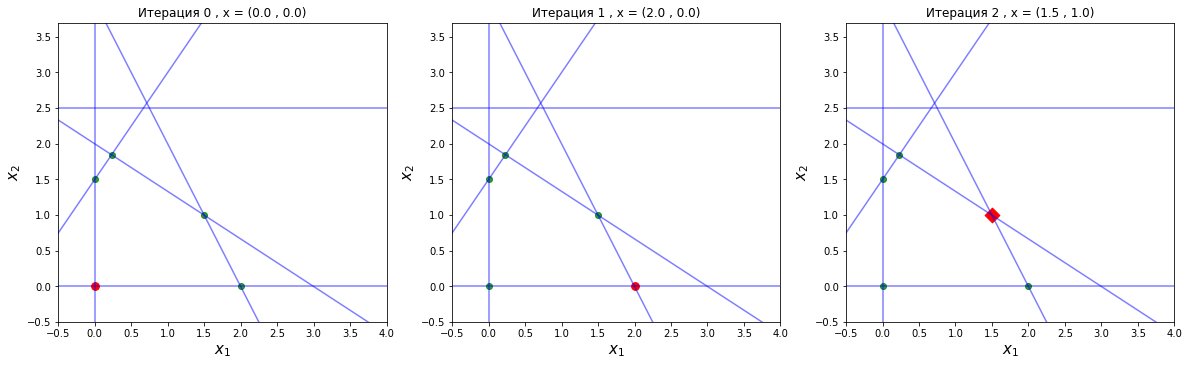

In [25]:
A=np.array([[2,3],[-3,2],[0,2],[2,1]])
b=np.array([6,3,5,4])
c=np.array([4,3])
result = solve_lin_prog(A, b, c, method='blend', draw=True)
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])

Точка:  [ 1.5  1. ]
Ответ:  9.0
Количество итераций:  3


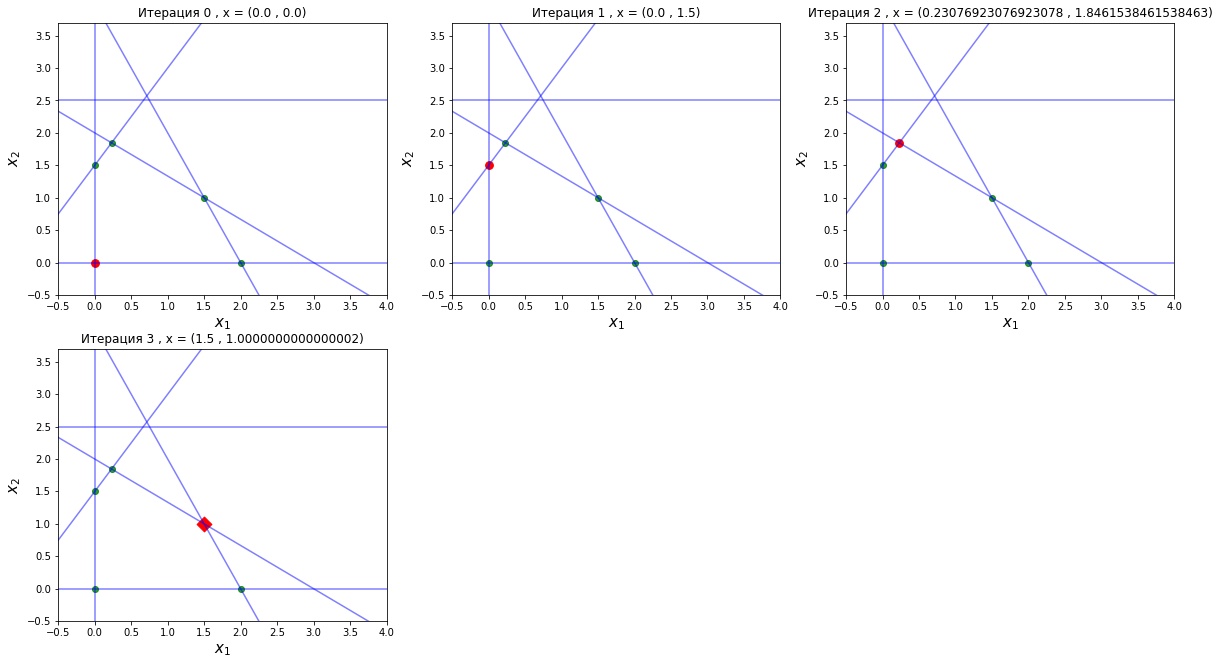

In [28]:
result = solve_lin_prog(A, b, c, method='lexical', draw=True)
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])

Пример 2

Точка:  [ 4.  0.]
Ответ:  20.0
Количество итераций:  1


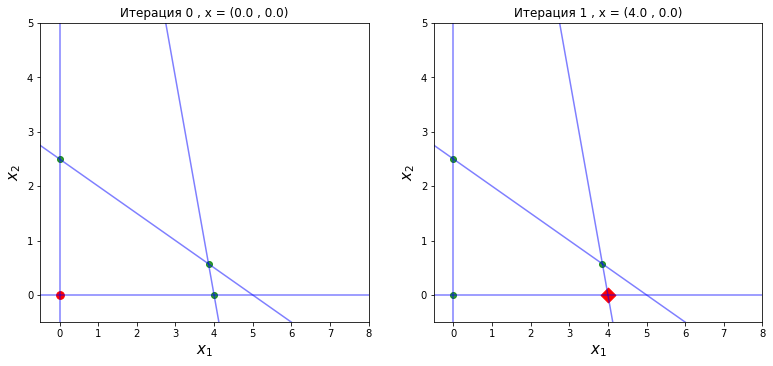

In [29]:
A=np.array([[1,2],[2,0.5]])
b=np.array([5,8])
c=np.array([5,1])
result = solve_lin_prog(A, b, c, method='max_coef', draw=True)
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])

Точка:  [ 4.  0.]
Ответ:  20.0
Количество итераций:  3


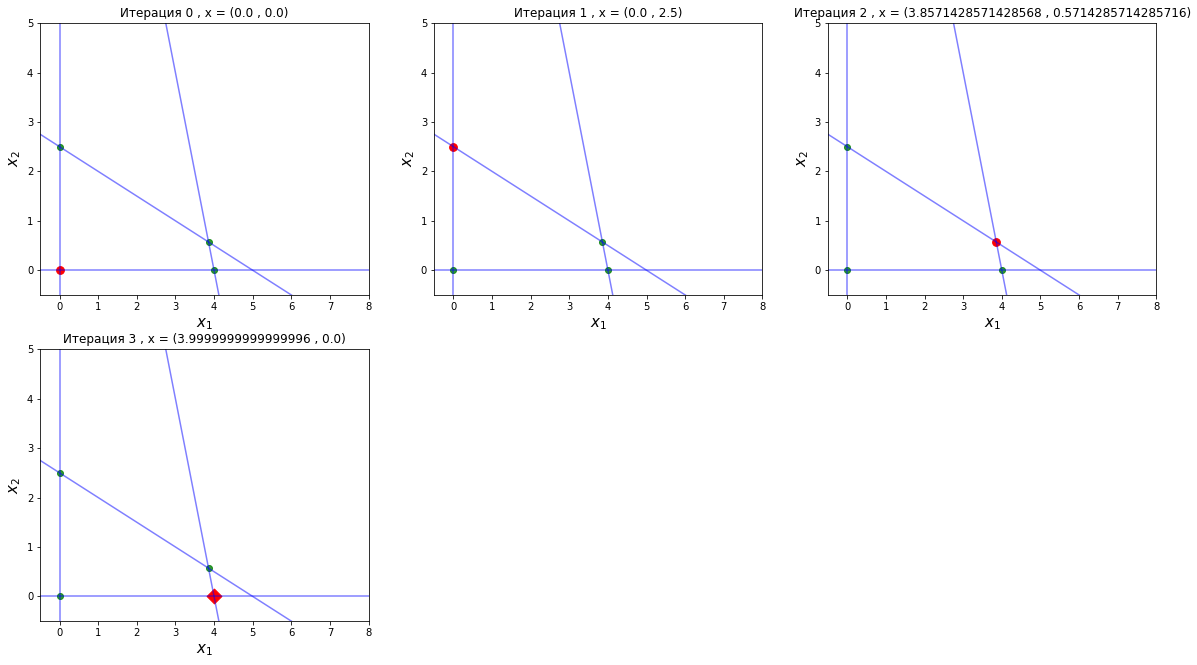

In [32]:
result = solve_lin_prog(A, b, c, method='lexical', draw=True)
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])

Пример 3

In [33]:
A=np.array([[2,3, 1],[4, 1, 2],[3, 4, 2]])
b=np.array([5, 11, 8])
c=np.array([5, 4, 3])
result = solve_lin_prog(A, b, c, method='blend')
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])

Точка:  [ 2.  0.  1.]
Ответ:  13.0
Количество итераций:  2


Пример 4

Точка:  [ 1.33333333  0.33333333]
Ответ:  -3.0
Количество итераций:  1


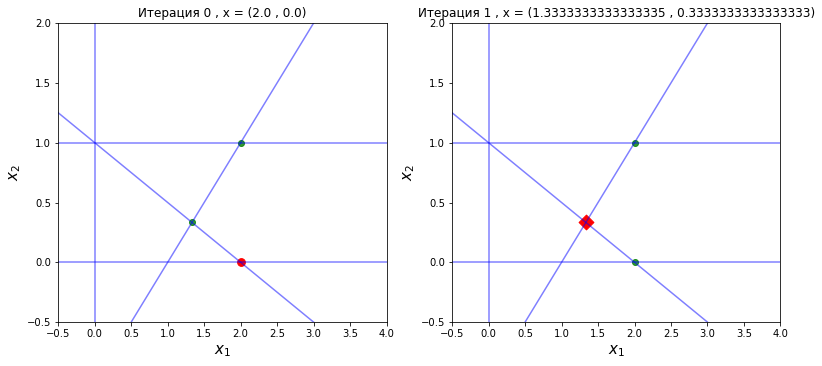

In [66]:
A = np.array([[-1,1], [-1, -2], [0, 1]])
b = np.array([-1,-2, 1])
c = [-2, -1]
result = solve_lin_prog(A, b, c, method='blend', draw=True)
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])

Точка:  [ 1.33333333  0.33333333]
Ответ:  -3.0
Количество итераций:  1


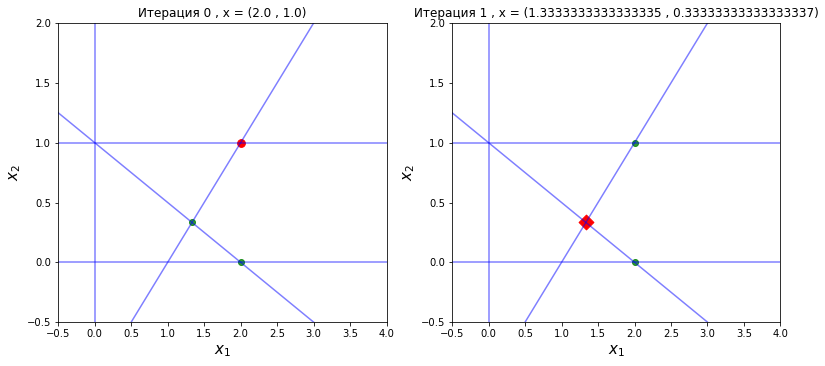

In [67]:
A = np.array([[-1,1], [-1, -2], [0, 1]])
b = np.array([-1,-2, 1])
c = [-2, -1]
start_point1=np.array([2., 1., 0., 1., 0.])

result = solve_lin_prog(A, b, c, method='lexical', draw=True, start_point=start_point1)
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])


Точка:  [ 1.33333333  0.33333333]
Ответ:  -3.0
Количество итераций:  1


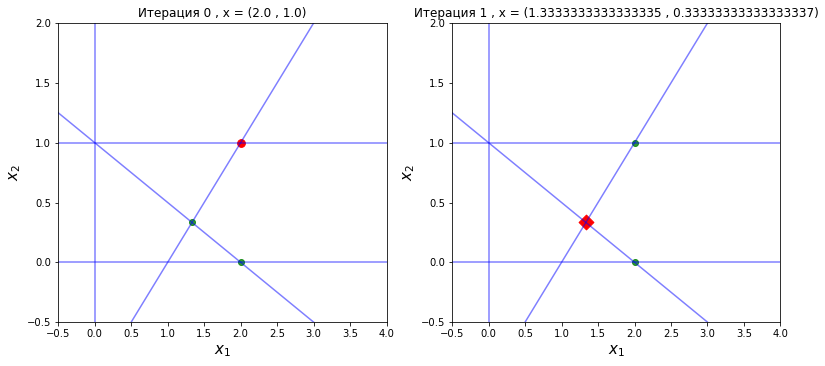

In [68]:
start_point2 = np.array([2., 0., 1., 0., 1.])
result = solve_lin_prog(A, b, c, method='blend', draw=True, start_point=start_point1)
print('Точка: ', result[1])
print('Ответ: ', result[0])
print('Количество итераций: ', result[2])

**Проверим на оптимальность**

In [23]:
A=np.array([[2,3],[-3,2],[0,2],[2,1]])
b=np.array([6,3,5,4])
c=np.array([4,3])
result = solve_lin_prog(A, b, c, method='blend')
print('Является ли решение оптимальным: ', is_optimal(A, b, c, result[1]))

Является ли решение оптимальным:  True


In [24]:
A=np.array([[1,2],[2,0.5]])
b=np.array([5,8])
c=np.array([5,1])
result = solve_lin_prog(A, b, c, method='max_coef')
print('Является ли решение оптимальным: ', is_optimal(A, b, c, result[1]))

Является ли решение оптимальным:  True


In [25]:
A=np.array([[2,3, 1],[4, 1, 2],[3, 4, 2]])
b=np.array([5, 11, 8])
c=np.array([5, 4, 3])
result = solve_lin_prog(A, b, c, method='blend')
print('Является ли решение оптимальным: ', is_optimal(A, b, c, result[1]))

Является ли решение оптимальным:  True


# Задача на МНК

## Задание 1 (0.2 балла)
1.	Постройте в одной координатной плоскости графики у(t, a) и  оценочные значения y(t,a*) для всех 3 методов

2.	Вычислите как отличается каждый из оценочных параметров от своего истинного значения. Как меняется это отличие при изменении σ?
3.	Скорректируйте y_corr[0]  и y_corr[-1] пусть одно из них будет на 50 больше, а другое на 50 меньше. Постройте новые оценочные значения параметров  и соответствующие графики. Какая из оценок получилась более устойчивой к выбросам?

## Задание 2 (0.2 балла)
Возьмем случайную матрицу A  200x80 и случайный вектор b из распределения N(0,1). 

1. Решите переопределенную систему тремя способами, минимизируя l1, l2 и linf нормы вектора b – Ax.
2. Постройте распределение ошибок для каждого решения.
3. Какими свойствами обладают распределения?

## Задание 1

## Решение
<br>

**Метод 0** <br>
Для каждого t нам нужно, оценив $a_0, a_1, a_2$, приблизить равенство $a_0 + a_1 t + a_2 sin(t) = y_{corr}$ по норме L2(сумма квадратов невязок)<br>
Сведем задачу к методу наименьших квадратов: $Ax = b$<br>
В данном случае:<br>
$x = (a_0, a_1, a_2)$ <br>
A - матрица: $A_i = (1, t, sin(t))$ <br>
$b = y_{corr}$<br>
Как мы знаем, решение такой задачи методом наименьших квадратов: $x^* = (A^T A)^{-1} A b$ <br> <br>

---

**Метод 1** <br>
В данном случае мы минимизируем величину $\sum_{i = 1}^m |{a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i}}| \rightarrow min$ <br>
Введем обозначения: <br>
$$a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i} = x_i, \; if \; a_0 + a_1 t_i + a_2 sin(t_i) >= y_{corr, i}$$ <br>
$$a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i} = - x_i, \; if \; a_0 + a_1 t_i + a_2 sin(t_i) < y_{corr, i}$$ <br>
Тогда получаем : $\forall i \; - x_i <= a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i} <= x_i$ <br>
Тогда задача сводится к задаче ЛП: <br> <br>
$\sum_{i =1}^m {x_i} \rightarrow min$ <br>
$a_0 + a_1 t_1 + a_2 sin(t_1) - x_1 <= y_{corr, 1}$ <br>
....<br>
$a_0 + a_1 t_m + a_2 sin(t_m) - x_m <= y_{corr, m}$ <br>
$a_0 + a_1 t_1 + a_2 sin(t_1) + x_1 >= y_{corr, 1}$ <br>
.... <br>
$a_0 + a_1 t_{m} + a_2 sin(t_{m}) + x_{m} >= y_{corr, {m}}$ <br>
$\forall i \; x_i >= 0$ <br>
$a_0, a_1, a_2 >= 0$ <br> <br>
Или в матричной форме: <br>
$<cx> \rightarrow min$ <br>
$(\;A \;\;\;\;E)x >= b \Rightarrow (-A \;-E)x <= -b$ <br>
$(A \; \;-E)x <= b $ <br>
$x >= 0$ <br>
где $x = (a_0, a_1, a_2, x_1, x_2, ...,x_m)$ <br>
$c = (0, 0, 0, 1, 1, ..., 1)$ <br>
$b = y_{corr}$ <br>
$A_i = [1, t_i, sin(t_i)]$ <br> <br>

Чтобы перейдем к задаче максимизации, будем рассматривать $<-c \; x> \rightarrow max$ <br>
Для решения этой задачи будем пользоваться уже написанным симплекс-методом. 

---

**Метод 2**  <br>
В данном случае мы минимизируем величину $\max_{i = 1}^m |{a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i}}| \rightarrow min$ <br>
Введем обозначения, как и раньше: <br>
$$a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i} = x_i, \; if \; a_0 + a_1 t_i + a_2 sin(t_i) >= y_{corr, i}$$ <br>
$$a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i} = - x_i, \; if \; a_0 + a_1 t_i + a_2 sin(t_i) < y_{corr, i}$$ <br>
Тогда нужно минимизировать: $x = \max_{i = 1}^m x_i \rightarrow min$ <br> <br>
Получаем что  $\forall i \; - x <= a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i} <= x$ <br>
Тогда задача сводится к задаче ЛП: <br> <br>
$\sum_{i =1}^m {x_i} \rightarrow min$ <br>
$a_0 + a_1 t_1 + a_2 sin(t_1) - x <= y_{corr, 1}$ <br>
....<br>
$a_0 + a_1 t_m + a_2 sin(t_m) - x <= y_{corr, m}$ <br>
$a_0 + a_1 t_1 + a_2 sin(t_1) + x >= y_{corr, 1}$ <br>
.... <br>
$a_0 + a_1 t_m + a_2 sin(t_m) + x >= y_{corr, {m}}$ <br>
$x >= 0$ <br>
$a_0, a_1, a_2 >= 0$ <br> <br>
Или в матричной форме: <br>
$<cx> \rightarrow min$ <br>
$(\;A \;\;\;\; 1)x >= b \Rightarrow (-A \;-1)x <= -b$ <br>
$(A \; \;-1)x <= b $ <br>
$x >= 0$ <br>
где $x = (a_0, a_1, a_2, x)$ <br>
$c = (0, 0, 0, 1)$ <br>
$b = y_{corr}$ <br>
$A_i = [1, t_i, sin(t_i)]$ <br> <br>
Как и раньше сведем задачу к задаче максимизации, то есть $<-c \; x> \rightarrow max$

In [10]:
from math import sin

"""Пусть физический закон описывается зависимостью 
некоторого измеряемого значения y(x, a) 
от времени и координаты x при параметрах a:"""
def y(t,a): 
    return a[2]*sin(t)+a[1]*t +a[0]
    
"""
Дан набор координат t размера m, значения распределены равномерно. Пусть m = 200.
"""
m=200
t=np.array([i*10.0/m for i in range(m)])


"""Для каждого момента времени t сгенерируйте соответствующее 
значение y(t,a) при некоторых параметрах  a_0, a_1, a_2. Для примера: """
a=np.array([10,100,1000])

def get_y (a, σ):
    """Результаты измерений отличаются от истинных значений в силу действия случайной аддитивной помехи 
    (случайность подчиняется нормальному закону распределения N(0, σ))"""
    y_real=np.array([y(i,a) for i in t])
    y_corr=y_real+np.random.normal(0,σ,m)
    return y_real, y_corr

σ=200

#генерация значений. изначальные и с помехами
y_real, y_corr= get_y(a,σ)


def get_params (y_corr, t, method=0):
    """
    По сгенерированному набору точек y_corr дайте оценку параметрам a
    закона с учетом знания общей формулы тремя различными способами:
    •	method=0 -> сумма квадратов невязок будет минимальна.
    •	method=1 -> сумма абсолютных значений невязок будет минимальна.
    •	method=2 -> максимальное абсолютное значение невязки будет минимально.
    
    #todo - написать ф-ю
    """
    if method == 0:
        A = np.concatenate((np.ones((m, 1)), np.array(t).reshape((m, 1)), np.sin(t).reshape((m, 1))), axis=1)
        a = ((np.linalg.inv(np.dot(A.T, A))).dot(A.T)).dot(y_corr)
        
    elif method == 1:
        A = np.concatenate((np.ones((m, 1)), np.array(t).reshape((m, 1)), np.sin(t).reshape((m, 1))), axis=1)
        A1 = np.concatenate((-A, -np.eye(m)), axis=1)
        A2 = np.concatenate((A, -np.eye(m)), axis=1)
        A = np.concatenate((A1, A2), axis=0)
        b = np.append(-y_corr, y_corr)
        c = np.append([0., 0., 0.], [-1.]*m)
        result = solve_lin_prog(A, b, c, method='max_coef')
        a = result[1][:3]
    else:
        A = np.concatenate((np.ones((m, 1)), np.array(t).reshape((m, 1)), np.sin(t).reshape((m, 1))), axis=1)
        A1 = np.concatenate((-A, -np.ones((m, 1))), axis=1)
        A2 = np.concatenate((A, -np.ones((m, 1))), axis=1)
        A = np.concatenate((A1, A2), axis=0)
        b = np.append(-y_corr, y_corr)
        c = np.array([0., 0., 0., -1.])
        result = solve_lin_prog(A, b, c, method='max_coef')
        a = result[1][:3]
    return a

**выберем маленькую $\sigma = 0.5$**

In [79]:
σ=0.5
y_real, y_corr= get_y(a,σ)

In [35]:
a0 = get_params (y_corr, t, method=0)
print(a0)

[   8.94627792  101.60420998  994.91814272]


In [81]:
a1 = get_params (y_corr, t, method=1)
print(a1)

[    9.98107994   100.01434347  1000.03727989]


In [82]:
a2 = get_params (y_corr, t, method=2)
print(a2)

[  10.15326503   99.97716825  999.94478005]


Как видим, получилось похоже на истинные параметры.

**выберем $\sigma = 200$**

In [97]:
σ=200
y_real, y_corr= get_y(a,σ)

In [87]:
a0 = get_params (y_corr, t, method=0)
print(a0)

[   31.51459546    94.81707033  1058.72148963]


In [108]:
a1 = get_params (y_corr, t, method=1)
print(a1)

[   15.84675202    97.5556424   1009.63023279]


In [110]:
a2 = get_params (y_corr, t, method=2)
print(a2)

[   0.          101.24561484  828.12858885]


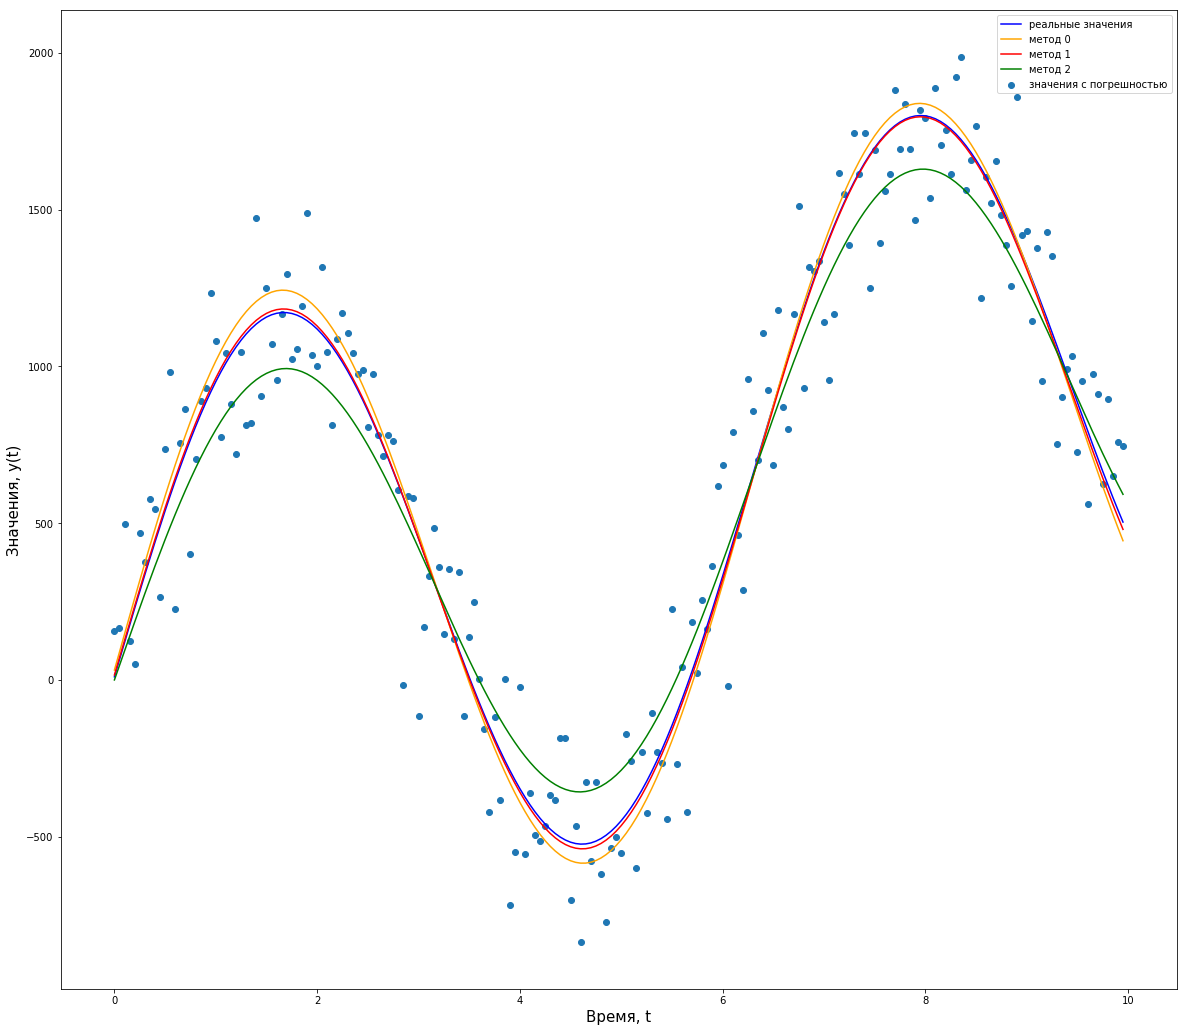

In [116]:
y0 = a0[0] + a0[1]*t + a0[2] * np.sin(t)
y1 = a1[0] + a1[1]*t + a1[2] * np.sin(t)
y2 = a2[0] + a2[1]*t + a2[2] * np.sin(t)
plt.figure(figsize = (20, 18))
plt.plot(t, y_real, label = 'реальные значения',c = 'b')
plt.plot(t, y0, label='метод 0', c='orange')
plt.plot(t, y1, label='метод 1', c='r')
plt.plot(t, y2, label='метод 2', c='g')
plt.scatter(t, y_corr, label='значения с погрешностью')
plt.legend()
plt.xlabel('Время, t', fontsize=15)
plt.ylabel('Значения, y(t)', fontsize=15)
plt.show()

Как видим, получилось очень похоже. Как видно из графика, особенно хорошо (в данном случае) оценивает параметры метод 1, минимизирующий величину $\sum_{i = 1}^m |{a_0 + a_1 t_i + a_2 sin(t_i) - y_{corr, i}}|$, то есть сумму абсолютных значений невязок.

**Посмотрим на зависимость ошибки от $\sigma$** <br>
Заметим что в некоторых случаях в связи с маленькими значениями  и чередой матричных перемножений в матрице A могут получится очень маленькие значения, которые распознаются компьютером как нули. Из-за этого не всегда получается взять обратную матрицу к матрице A. Поэтому будем использовать цикл, пока на всех итерациях симплекс-метода не сможем успешно вычислить матрицу $A^{-1}$

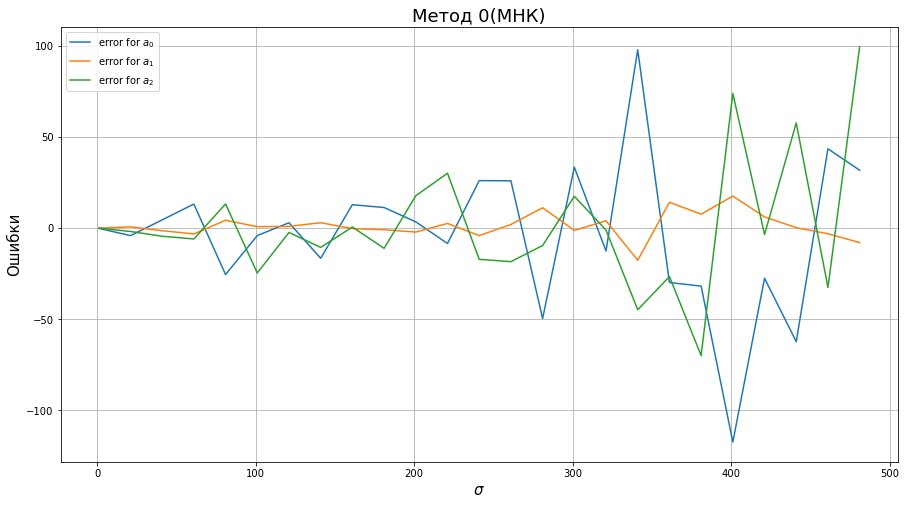

In [18]:
sigmas = np.arange(1, 500, 20)
errors = []
for sigma in sigmas:
    y_real, y_corr = get_y(a, sigma)
    errors.append(get_params(y_corr, t, method=0) - a)

errors = np.array(errors)
plt.figure(figsize=(15, 8))
plt.plot(sigmas, errors[:, 0], label='error for $a_0$')
plt.plot(sigmas, errors[:, 1], label='error for $a_1$')
plt.plot(sigmas, errors[:, 2], label='error for $a_2$')
plt.xlabel('$\sigma$', fontsize=15)
plt.grid()
plt.ylabel('Ошибки', fontsize=15)
plt.title('Метод 0(МНК)', fontsize=18)
plt.legend()
plt.show()

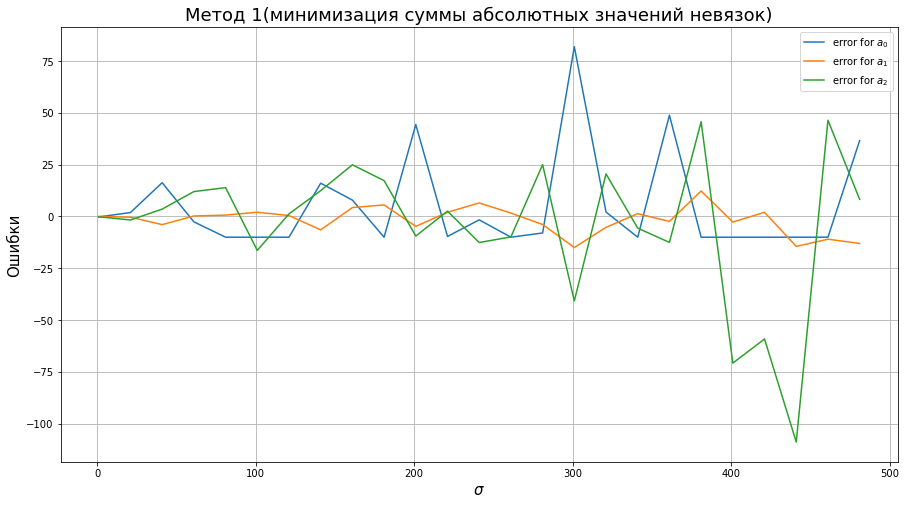

In [14]:
sigmas = np.arange(1, 500, 20)
errors = []
for sigma in sigmas:
    success = False
    while not success:
        try:
            y_real, y_corr = get_y(a, sigma)
            result = get_params(y_corr, t, method=1)
            success = True
        except:
            pass
    errors.append(result - a)

errors = np.array(errors)
plt.figure(figsize=(15, 8))
plt.plot(sigmas, errors[:, 0], label='error for $a_0$')
plt.plot(sigmas, errors[:, 1], label='error for $a_1$')
plt.plot(sigmas, errors[:, 2], label='error for $a_2$')
plt.xlabel('$\sigma$', fontsize=15)
plt.ylabel('Ошибки', fontsize=15)
plt.grid()
plt.title('Метод 1(минимизация суммы абсолютных значений невязок)', fontsize=18)
plt.legend()
plt.show()

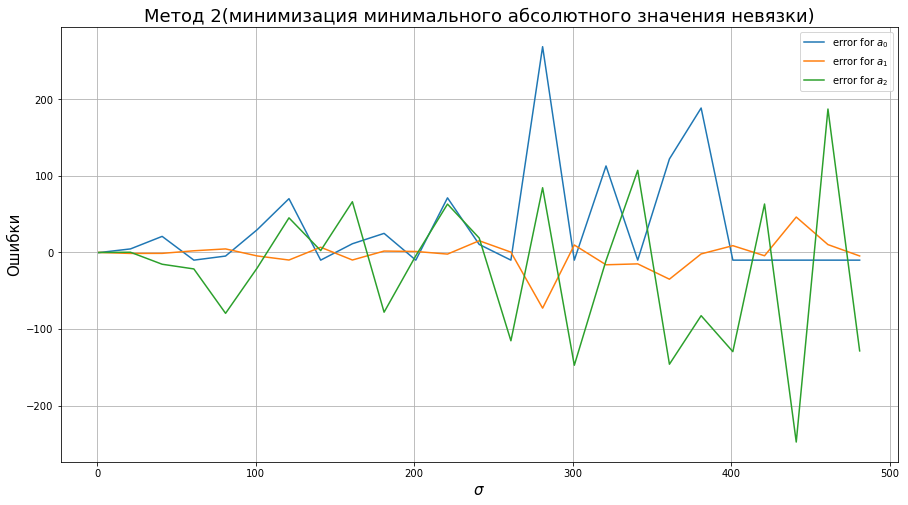

In [12]:
sigmas = np.arange(1, 500, 20)
errors = []
for sigma in sigmas:
    success = False
    while not success:
        try:
            y_real, y_corr = get_y(a, sigma)
            errors.append(get_params(y_corr, t, method=2) - a)
            success = True
        except:
            pass
        

errors = np.array(errors)
plt.figure(figsize=(15, 8))
plt.plot(sigmas, errors[:, 0], label='error for $a_0$')
plt.plot(sigmas, errors[:, 1], label='error for $a_1$')
plt.plot(sigmas, errors[:, 2], label='error for $a_2$')
plt.xlabel('$\sigma$', fontsize=15)
plt.ylabel('Ошибки', fontsize=15)
plt.grid()
plt.title('Метод 2(минимизация минимального абсолютного значения невязки)', fontsize=18)
plt.legend()
plt.show()

Как видно из графиков, при возрастании погрешности $\sigma$ величина ошибки при оценивании каждого из параметров $a_0, a_1, a_2$ тоже возрастает. Причем заметим, что ошибка для $a_1$ - коэффициенте при $t$, то есть $a^*_1 - a_1$, меньше ошибок для остальных параметров

**Теперь исказим данные и посмотрим какой из методов более устойчив к выбросам.**

In [19]:
σ = 200
y_real, y_corr= get_y(a,σ)
y_corr[0] += 50
y_corr[-1] -= 50

m=200
t=np.array([i*10.0/m for i in range(m)])

a0 = get_params (y_corr, t, method=0)
a1 = get_params (y_corr, t, method=1)
a2 = get_params (y_corr, t, method=2)

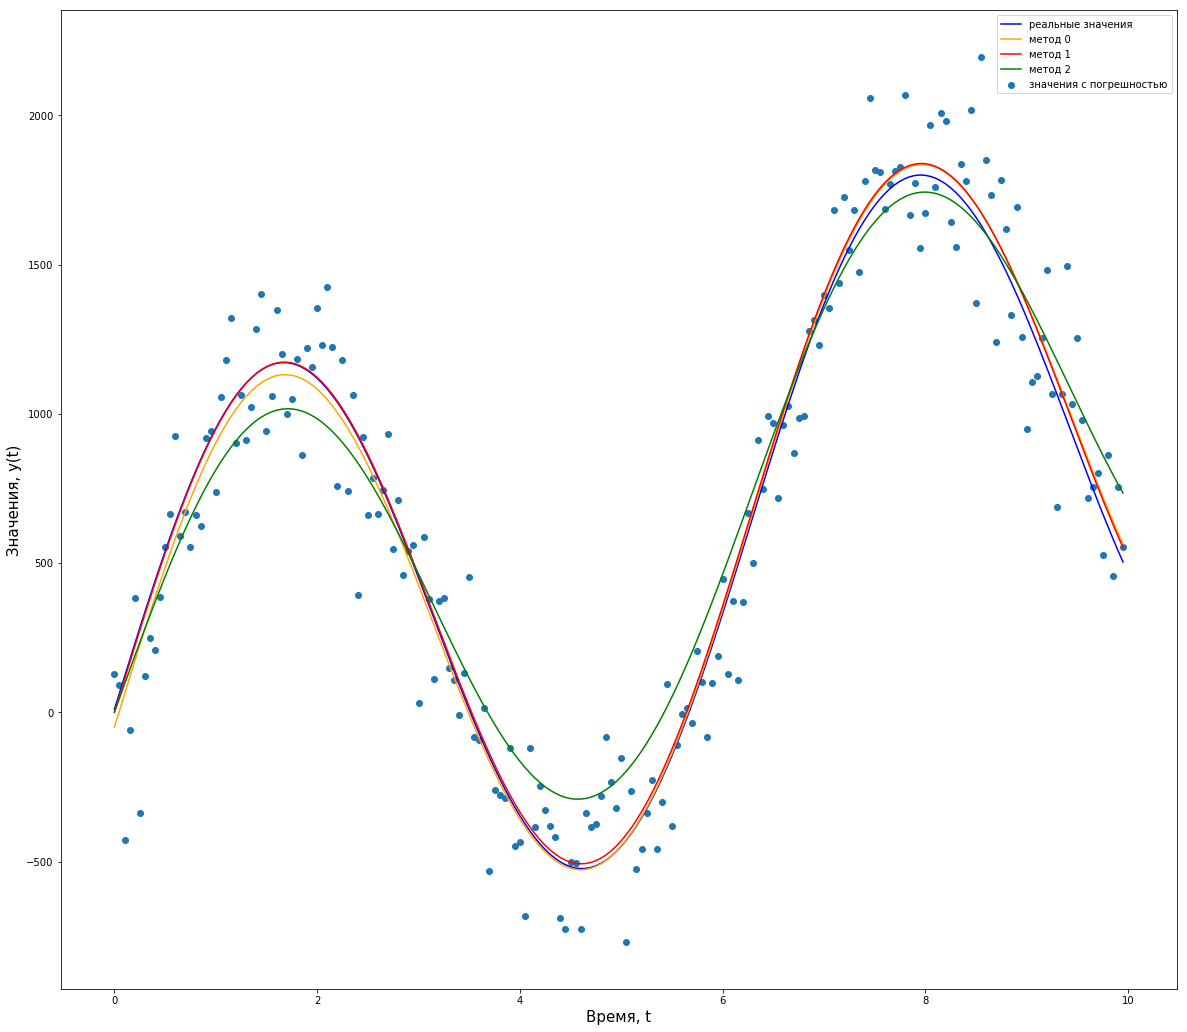

In [23]:
y0 = a0[0] + a0[1]*t + a0[2] * np.sin(t)
y1 = a1[0] + a1[1]*t + a1[2] * np.sin(t)
y2 = a2[0] + a2[1]*t + a2[2] * np.sin(t)
plt.figure(figsize = (20, 18))
plt.plot(t, y_real, label = 'реальные значения',c = 'b')
plt.plot(t, y0, label='метод 0', c='orange')
plt.plot(t, y1, label='метод 1', c='r')
plt.plot(t, y2, label='метод 2', c='g')
plt.scatter(t, y_corr, label='значения с погрешностью')
plt.legend()
plt.xlabel('Время, t', fontsize=15)
plt.ylabel('Значения, y(t)', fontsize=15)
plt.show()

Как видим, при небольшом искажении на 50 первого и последнего значений y_corr апроксимамация функций разными методами не сильно ухудшилась. <br>
Посмотрим, что будет если исказить значения сильнее.

In [53]:
σ = 200
y_real, y_corr= get_y(a,σ)
y_corr[0] += 2000
y_corr[-1] -= 2000

m=200
t=np.array([i*10.0/m for i in range(m)])

#метод 0
a0 = get_params (y_corr, t, method=0)
a0 = get_params (y_corr, t, method=1)
a0 = get_params (y_corr, t, method=2)

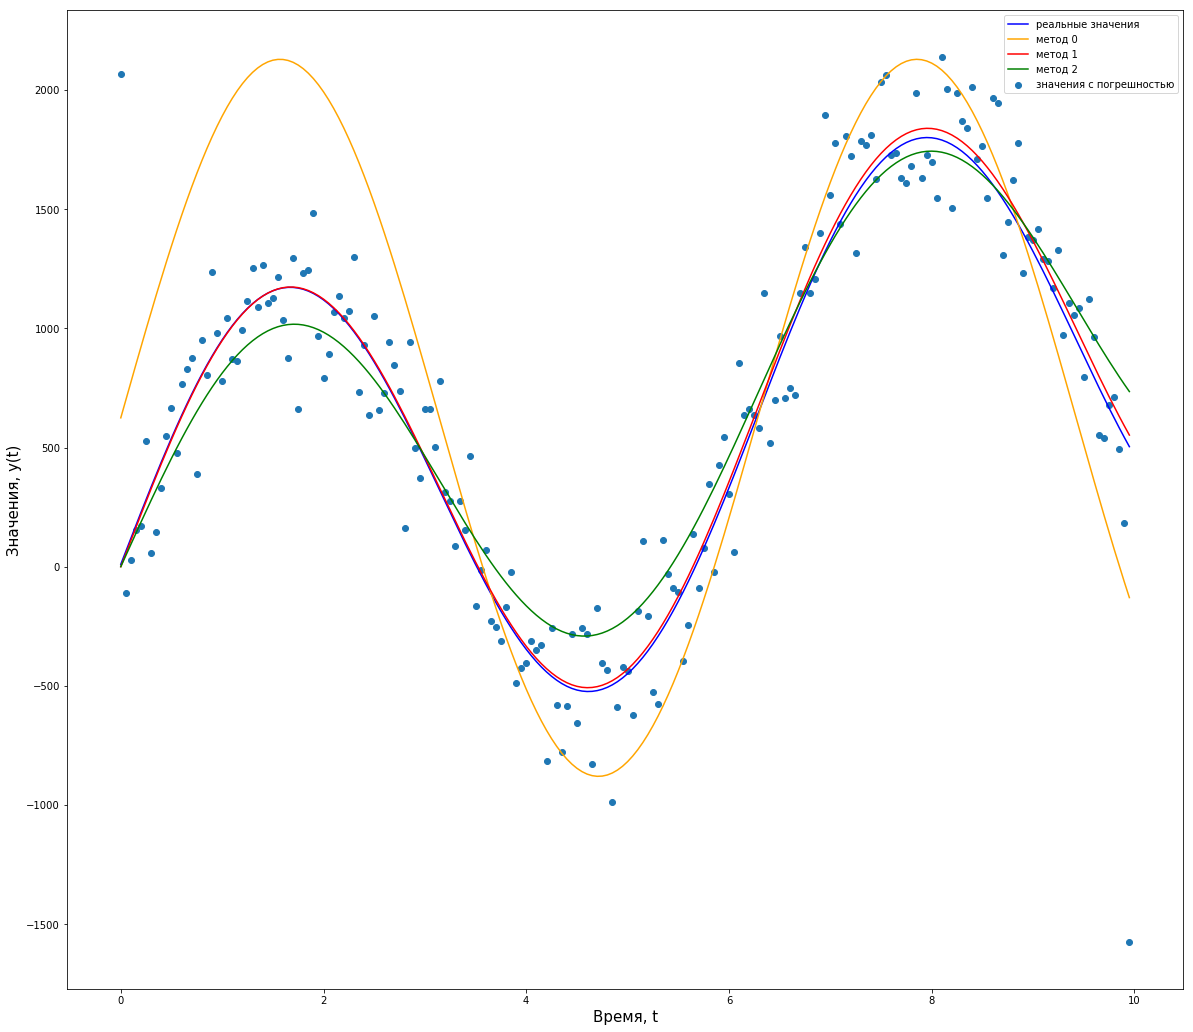

In [54]:
y0 = a0[0] + a0[1]*t + a0[2] * np.sin(t)
y1 = a1[0] + a1[1]*t + a1[2] * np.sin(t)
y2 = a2[0] + a2[1]*t + a2[2] * np.sin(t)
plt.figure(figsize = (20, 18))
plt.plot(t, y_real, label = 'реальные значения',c = 'b')
plt.plot(t, y0, label='метод 0', c='orange')
plt.plot(t, y1, label='метод 1', c='r')
plt.plot(t, y2, label='метод 2', c='g')
plt.scatter(t, y_corr, label='значения с погрешностью')
plt.legend()
plt.xlabel('Время, t', fontsize=15)
plt.ylabel('Значения, y(t)', fontsize=15)
plt.show()

Из данного графика видим, что МНК(метод 0) является самым неустойчивым к выбросам. Наоборот, самым устойчивым к выбросам является метод минимизации суммы абсолютных значений невязок (метод 1). <br>


**Вывод:** Из проделанных исследований поняли, что на данном примере метод минимизации суммы абсолютных значений является самым точным и самым устойчивым к выбросам, так что для получения более точных результатов слудует использовать его. Однако этот метод также является и самым затратным по времени. <br>
Также наглядно увидели, что при возрастании погрешности $\sigma$ ошибка в оценке параметров тоже увеличивается.


## Задание 2
<br>
## Решение

Заметим, что данная задача отличается от задания 1 только тем, что здесь матрица A имеет другой вид. <br>
**Почему?** <br>

1) Минимизация по норме L2 есть минимизация суммы квадратов невязок. В данном случае, как и ранее, используем МНК. <br>
2) Минимизация по норме L1 есть минимизация сумма абсолютных значений невязок. В данном случае, как и ранее, решаем задачу симлекс-методом с матрицей A и векторами b, c описанными в методе 1 задания 1. <br>
3) Минимизация по норме Linf есть минимизация максимального абсолютного значения невязки. В данном случае решаем задачу симплекс-методом, описанным в методе 2 задания 1. <br> <br>

Напишем вспомогательную функцию, почти дословно повторяющую функцию get_params. Единственное отличие в том, что матрицу A и вектор b мы теперь генерируем и в симплекс-методе пишем цикл для избежание ошибок из-за необратимости матрицы A.

In [10]:
def get_x (n, m, method=0):
    
    if method == 0:
        #генерируем A и b
        A = np.random.randn(m, n)
        b = np.random.randn(m)
        x = ((np.linalg.inv(np.dot(A.T, A))).dot(A.T)).dot(b)
    
    elif method == 1:
        success = False
        while not success:
            try:
                #генерируем A и b
                A = np.random.randn(m, n)
                b = np.random.randn(m)
                
                #переходим к задаче ЛП, описанной ранее
                A1 = np.concatenate((-A, -np.eye(m)), axis=1)
                A2 = np.concatenate((A, -np.eye(m)), axis=1)
                A_ = np.concatenate((A1, A2), axis=0)
                b_ = np.append(-b, b)
                c_ = np.append([0.]*n, [-1.]*m)
                result = solve_lin_prog(A_, b_, c_, method='max_coef')
                success = True
            except:
                pass
        x = result[1]
        
    else:
        success = False
        while not success:
            try:
                #генерируем A и b
                A = np.random.randn(m, n)
                b = np.random.randn(m)

                #переходим к задаче ЛП, описанной ранее
                A1 = np.concatenate((-A, -np.ones((m, 1))), axis=1)
                A2 = np.concatenate((A, -np.ones((m, 1))), axis=1)
                A_ = np.concatenate((A1, A2), axis=0)
                b_ = np.append(-b, b)
                c_ = np.array([0.]*n + [-1.])
                result = solve_lin_prog(A_, b_, c_, method='max_coef')
                success = True
            except:
                pass
        x = result[1][-n:]
    return A, b, x


n = 80
m = 200

A0, b0, x0 = get_x (n, m, method=0)
A1, b1, x1 = get_x (n, m, method=1)
A2, b2, x2 = get_x (n, m, method=2)


errors0 = np.dot(A0, x0) - b0
errors1 = np.dot(A1, x1[-n:]) - b1
errors2 = np.dot(A2, x2) - b2


plt.figure(figsize=(15, 8))
plt.hist(errors0, bins=15)
plt.title('Распределение ошибок для МНК (метод 0)')
plt.show()

plt.figure(figsize=(15, 8))
plt.hist(errors1, bins=15)
plt.title('Распределение ошибок для метода с нормой L1 (метод 1)')
plt.show()

plt.figure(figsize=(15, 8))
plt.hist(errors2, bins=15)
plt.title('Распределение ошибок для метода с нормой Linf (метод 2)')
plt.show()

**Строим распределение ошибок для каждого решения** <br>
Для того, чтобы понять какое распределение имеют ошибки, мы можем посмотреть на гистаграмму ошибок и попробовать по ней понять, какая же плотность этого распределения.

In [13]:
n = 80
m = 200

A0, b0, x0 = get_x (n, m, method=0)
A1, b1, x1 = get_x (n, m, method=1)
A2, b2, x2 = get_x (n, m, method=2)

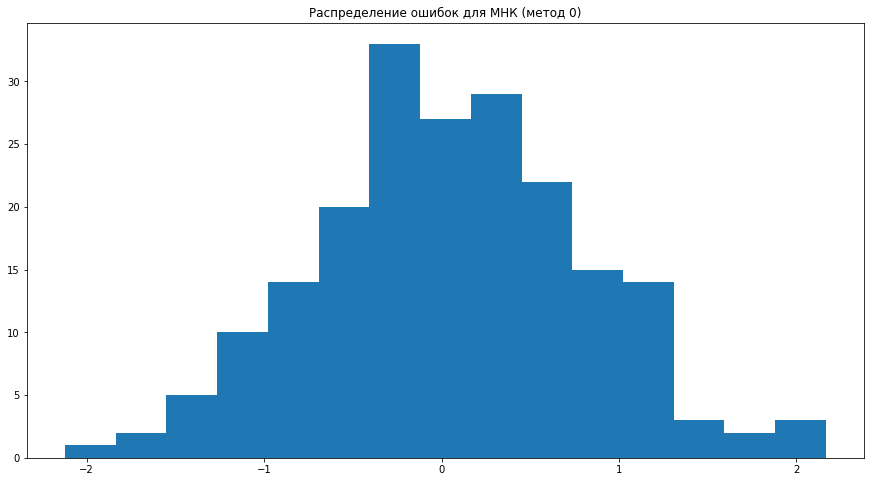

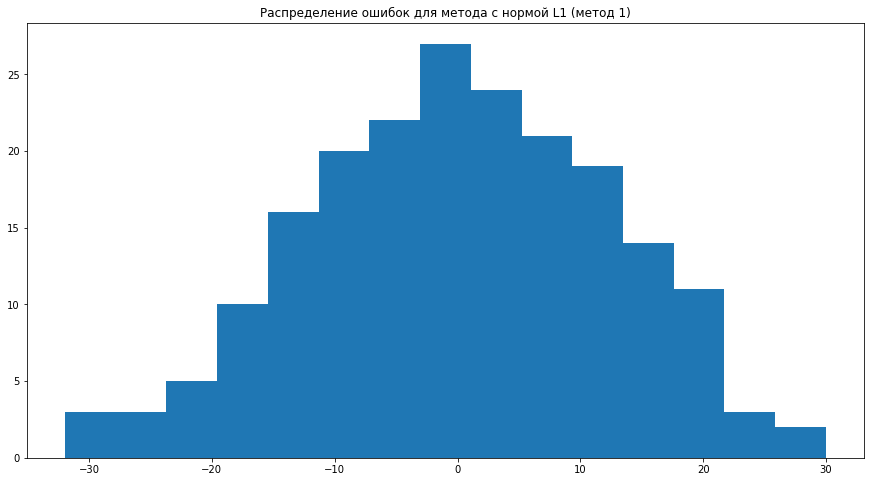

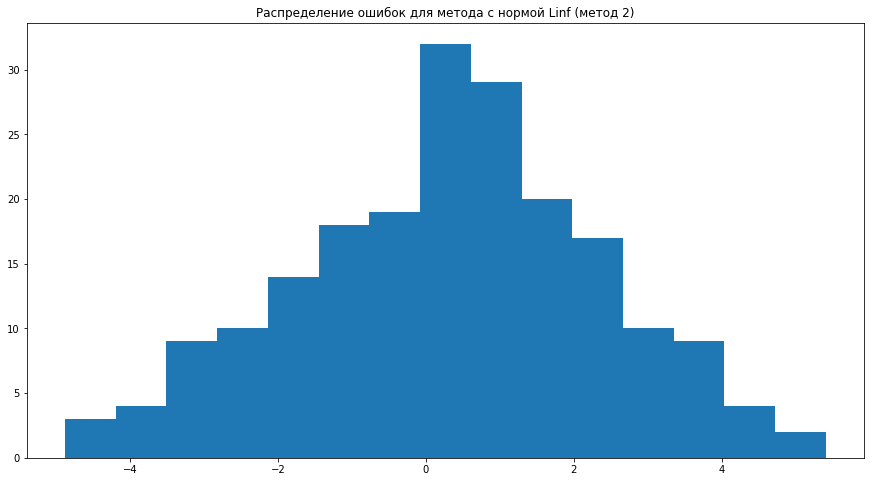

In [22]:
errors0 = np.dot(A0, x0) - b0
errors1 = np.dot(A1, x1[-n:]) - b1
errors2 = np.dot(A2, x2) - b2


plt.figure(figsize=(15, 8))
plt.hist(errors0, bins=15)
plt.title('Распределение ошибок для МНК (метод 0)')
plt.show()

plt.figure(figsize=(15, 8))
plt.hist(errors1, bins=15)
plt.title('Распределение ошибок для метода с нормой L1 (метод 1)')
plt.show()

plt.figure(figsize=(15, 8))
plt.hist(errors2, bins=15)
plt.title('Распределение ошибок для метода с нормой Linf (метод 2)')
plt.show()

Это очень похоже на нормальное распределение. Также из графика видно, что мода (значение принимаемое с набольшей вероятностью), математическое ожидание и медиана(квантиль порядка 0.5) равны примерно 0. Равенство этих трех величин является одним из свойств нормального распределения, так что еще раз убеждаемся, что ошибки распределены нормально. 

## Бонус +1 Балл
Напишите программу которая для обоих методов из задачи 5 будет использовать 2^n-1 итераций (бонус за каждый метод) и напишите обоснование (итого 0.5 балла за каждый метод)

**Будем решать для метода Бланда.** <br>
Найдем пример, который будет работать экспоненциальное время (П. Тарасов сказал, что здесь этого достаточно. То есть не обязательно приводить пример для которого кол-во итераций будет равно $2^n - 1$, достаточно лишь экспоненциального кол-ва) <br><br>

Для начала нам нужно составить такую систему лин. уравнений, что у нее будет экспоненциальное кол-во допустимых точек (так как в ходе симплекс-метода мы прыгаем только по допустимым точкам и при использовании метода Бланда в каждой допустимой точке мы окажемся не больше одного раза). <br>

Рассмотрим куб Кли-Минти, который задается системой линейных уравнений, описанной ниже. <br>

Пусть у нас есть $n$ переменных - {$x_1, x_2, ..., x_n$}. Возьмем $\epsilon < 1/2$ и рассмотрим задачу ЛП в следующей форме: <br>
$\epsilon^{n-1} x_1 + \epsilon^{n-2} x_2 + ... \epsilon x_{n-1} + x_n \rightarrow max$ <br>
$x_1 <= 1$ <br>
$2 \epsilon x_1 + x_2 <= 1$ <br>
$2 \epsilon^2 x_1 + 2 \epsilon x_2 + x_3 <= 1$ <br>
.... <br>
$2 \epsilon^{n-1} x_1 + 2 \epsilon^{n-2} x_2 + ... + 2 \epsilon x_{n-1} + x_n <= 1$ <br>
$\forall i : x_i >= 0$ <br> <br>
Решением такой задачи будет является вектор [0, 0, ..., 0, 1] <br><br>

Поймем как выглядит ограничительный многогранник и какие базисные точки есть у такой задачи ЛП. <br>
Рассмотрим сначала $n = 2$: <br>
$\epsilon x_1 + x_2 \rightarrow max$ <br>
$x_1 <= 1$ <br>
$2\epsilon x_1 + x_2 <= 1$ <br>
$\forall i : x_i >= 0$ <br>
Тогда базисные точки: $[0, 0], [0, 1], [1, 0], [1, 1 - 2\epsilon]$ <br>
Как выглядит многогранник в данном случае при $\epsilon = \frac{1}{3}$:


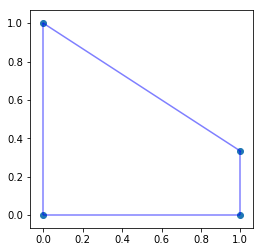

In [32]:
plt.figure(figsize=(4, 4))
plt.hlines(0, 0, 1, colors='blue', alpha=0.5)
plt.vlines(0, 0, 1, colors='blue', alpha=0.5)
plt.plot([0, 1], [1, 1 - 2/3], color='blue', alpha=0.5)
plt.vlines(1, 0, 1- 2/3, colors='blue', alpha=0.5)
plt.scatter([0, 0, 1, 1], [0, 1, 0, 1- 2/3])
plt.show()

В данном случае мы сначала провели прямые, соответствующие $x_1 = 0$ и $x_2 = 0$. Получили базисную точку (0,0).  <br>
Потом проводим прямую $x_1 = 1$ и получаем базисную точку (1,0) (заметим, что эта точка точно будет базисной, так как $\epsilon < \frac{1}{2}$ и следовательно прямая $x_1 = 1$ и $2\epsilon x_1 + x_2 = 1$ пересекутся выше этой точки). <br>
И потом проведем прямую $2\epsilon x_1 + x_2 = 1$ и получим еще 2 допустимых базисных точки: (0, 1) и (1, 1 - $2\epsilon$) <br>
<br>

Теперь докажем по индукции, что если так подряд проводить прямые, то прямые, соответствующие i-ому ограничительному условию будут добавлять по $2^{i - 1}$ допустимых базисных точек. <br>
База индукции уже доказана. <br>
Пусть предположение верно для $\forall i < n$. <br>
Рассмотрим n-ое уравнение: $2 \epsilon^{n-1} x_1 + 2 \epsilon^{n-2} x_2 + ... + 2 \epsilon x_{n-1} + x_n <= 1$ <br>
Если $x_1 = 0$, то получим уравнение, аналогичное (n-1)-ому уравнению. По предположению индукции оно добавляет $2^{n - 2} $ <br>
Если $x_1 = 1$, то также получим уравнение, аналогичное (n-1)-ому уравнению только с другим свободным коэффициентом, который в силу маленького $\epsilon$ очень мал. По предположению индукции оно добавляет $2^{n - 2} $ <br> 
Итого получим, что n-ое уравнение добавило $2^{n-1}$ базисных точек.<br>

Тогда всего допустимых базисных точек будет $1 + \sum_{i=0}^n {2^i} = 1 + 2^n - 1 = 2^n$

В силу того, что мы берем маленький $\epsilon$, многогранник для произвольного  n  не будет сильно отличаться от n-мерного куба. Этот многогранник представляет собой n-мерный куб, у которого слегка отсечены некоторые стороны.


В связи с тем что, метод Бланда на каждой итерации берет в качестве входящей переменной переменную с минимальным индексом, у которой коэффициент в весовой функции положителен, то на первой итерации мы выберем $x_1$ в качестве входящей переменной. <br>
После этого мы переделываем матрицу A и векторы b и c, выражая $x_1$ через остальные переменные. <br>
Заметим, что $x_1$ выражается только через фиктивные, поэтому коэффициенты при нефиктивных небазисных переменных остануться теми же,а коэффициент при $x_1$ станет равен 0. <br>
Поэтому на второй итерации будет выбрана $x_2$ как входящая переменная (так как ее коэффициент в весовой функции положителен и она имеет минимальный индекс из всех таких переменных). Причем $x_1$ не будет входящей. После этого мы опять переделываем матрицу A и векторы b и c, выражая $x_2$ через остальные переменные.  <br>
Заметим, что в выражении $x_2$ через небазисные переменные будут присутствовать только фиктивные переменные, поэтому коэффициенты при нефиктивных небазисных переменных остануться теми же,а коэффициент при $x_2$ станет равен 0. <br>
И так далее для каждой переменной. <br>
При таких переходах по вершинам такого псевдокуба нам придется обойти хотя бы одно полупространство куба, в котором находится $2^{n-1}$ вершин. <br>


Для наглядности посмотрим на то, по каким вершинам и в каком порядке будет ходить симплекс-метод при $n=2$ и $n=3$.

n = 2

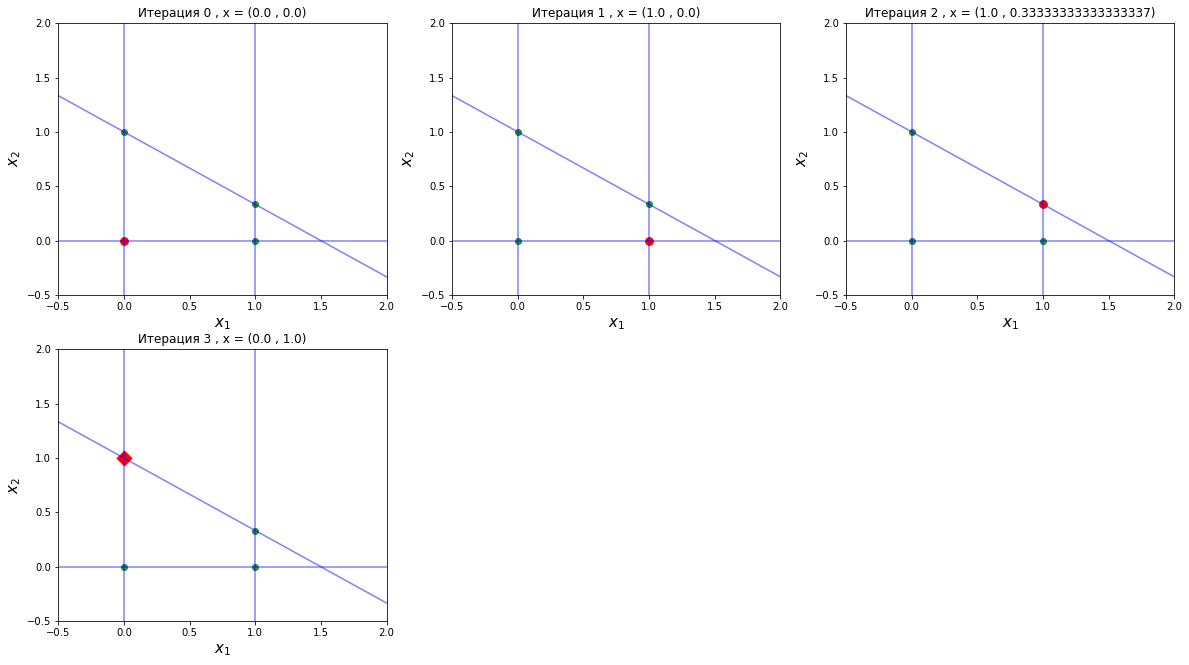

In [57]:
eps = 1/3
n = 2
raw = np.append([2* eps**(n - i) for i in range(1,n)], 1)
A = []

for i in range(n):
    A.append(np.append(raw[n-1-i:], [0]*(n-1-i)))
   

A = np.array(A)
c = np.array([eps**(n - i) for i in range(1,n+1)])
b = np.array([1.]*n)

result = solve_lin_prog(A, b, c, method='blend', draw=True)
        

На следующей картинке я проиллюстрировала пример для $n = 3$ : ![картинка](https://ibin.co/3gHQ46NCYDC9.png)

Теперь посмотрим на кол-во итераций при разных $n$

In [64]:
eps = 1/3

for n in range(2, 30):
    raw = np.append([2* eps**(n - i) for i in range(1,n)], 1)
    A = []
    for i in range(n):
        A.append(np.append(raw[n-1-i:], [0]*(n-1-i)))


    A = np.array(A)
    c = np.array([eps**(n - i) for i in range(1,n+1)])
    b = np.array([1.]*n)
    result = solve_lin_prog(A, b, c, method='blend')
    print('n = ', n, ': кол-во итераций = ', result[2])

n =  2 : кол-во итераций =  3
n =  3 : кол-во итераций =  5
n =  4 : кол-во итераций =  9
n =  5 : кол-во итераций =  15
n =  6 : кол-во итераций =  25
n =  7 : кол-во итераций =  41
n =  8 : кол-во итераций =  67
n =  9 : кол-во итераций =  109
n =  10 : кол-во итераций =  177
n =  11 : кол-во итераций =  287
n =  12 : кол-во итераций =  465
n =  13 : кол-во итераций =  753
n =  14 : кол-во итераций =  1219
n =  15 : кол-во итераций =  1973
n =  16 : кол-во итераций =  3193
n =  17 : кол-во итераций =  5167
n =  18 : кол-во итераций =  8361
n =  19 : кол-во итераций =  13529
n =  20 : кол-во итераций =  21891
n =  21 : кол-во итераций =  35421
n =  22 : кол-во итераций =  57313
n =  23 : кол-во итераций =  92735
n =  24 : кол-во итераций =  150049
n =  25 : кол-во итераций =  242785
n =  26 : кол-во итераций =  392835
n =  27 : кол-во итераций =  635621
n =  28 : кол-во итераций =  1028457
n =  29 : кол-во итераций =  1664079


Из полученных чисел виден экспоненциальный рост количества итераций в зависимости от $n$